In [96]:
from data.SnowflakeConnection import connectionBD
from data.SqlCommand import sqlCommand
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [99]:
def grafPie(dfD, dfg, location=""):
    total_precio = dfD.groupby(dfg).count()
    colors = sns.color_palette('pastel')[0:6]
    co = total_precio.columns[0]
    plt.pie(total_precio[co], labels=total_precio.index, colors=colors,
            autopct='%.0f%%')
    plt.title(f"Graph pie: {location}")
    plt.show()


def grafBar(data, location=""):
    fig = plt.figure(figsize=(10, 5))
    # plt.title(f"Inscription by {data.name}: {location}")
    sns.countplot(data, order=data.value_counts().index)
    plt.xticks(rotation=90)
    plt.show()


def graf3Rel(df, xd, yd, zd):

    sns.relplot(x=xd, y=yd, hue=zd, data=df)
    # plt.title(f"Inscription by {df.university.unique()[0]}")
    plt.xticks(rotation=90)
    plt.show()


def grafBox(var1, var2, location=""):
    # plt.title(f"Inscription by {var1.name}:{var2.name}:{location}")
    sns.boxplot(x=var1, y=var2)
    plt.xticks(rotation=90)
    plt.show()


def grafViolin(df,x, y, location=""):
    # plt.title(f"Inscription by {var1.name}:{var2.name}:{location}")
    sns.violinplot(data = df, x= x, y= y )
    plt.xticks(rotation=90)
    plt.show()


def PieObj(df):
    df.info()
    dataObj = df.select_dtypes(object)
    dataNum = df.select_dtypes(include=[np.float64,np.int64])
    
    dataO = dataObj.columns[:]
    dataN = dataNum.columns[:]
    dfNum = df[dataN]
    for i in dataO:
        grafPie(dfD=df, dfg=i, location=i)
    # for i in dataO:
        # grafPie(dfD=df, dfg=i, location=i)
    dfNum.hist(bins=20, figsize=(20, 10))
    plt.show()

In [77]:
sqlCommands = sqlCommand(path='./data/sql/')
sqlCommands

['Construccion.sql']


['SELECT "ID_Compra", "Cantidad", "Proveedor", "Pagado", "Fecha", "ID_Proyecto", "ID_MaterialConstruccion" FROM "DATA".CONSTRUCCION."Compra"',
 'SELECT "ID_Lider", "Nombre", "Primer_Apellido", "Segundo_Apellido", "Salario", "Ciudad_Residencia", "Cargo", "Clasificacion", "Fecha_Nacimiento" FROM "DATA".CONSTRUCCION."Lider"',
 'SELECT "ID_MaterialConstruccion", "Nombre_Material", "Importado", "Precio_Unidad" FROM "DATA".CONSTRUCCION."MaterialConstruccion"',
 'SELECT "ID_Proyecto", "Fecha_Inicio", "Constructora", "Numero_Banos", "Numero_Habitaciones", "Banco_Vinculado", "Porcentaje_Cuota_Inicial", "Ciudad", "Clasificacion", "Acabados", "ID_Tipo", "ID_Lider" FROM "DATA".CONSTRUCCION."Proyecto"',
 'SELECT "ID_Tipo", "Codigo_Tipo", "Area_Max", "Financiable", "Estrato" FROM "DATA".CONSTRUCCION."Tipo"',
 'SELECT  mc."ID_MaterialConstruccion" ,mc."Nombre_Material"  ,c."Cantidad" ,mc."Precio_Unidad" , c."Cantidad" *mc."Precio_Unidad" as Precio_Total ,p."ID_Proyecto" from  "DATA".CONSTRUCCION."Mat

In [78]:
sqlCommands[-1]

'SELECT    P."ID_Proyecto" , sum(c."Cantidad" *mc."Precio_Unidad" ) as  "Costo_Proyecto" from "DATA".CONSTRUCCION."Proyecto" p  natural join "DATA".CONSTRUCCION."MaterialConstruccion" mc natural join "DATA".CONSTRUCCION."Compra" c GROUP  by p."ID_Proyecto" ORDER  BY P."ID_Proyecto" '

In [79]:



conn = connectionBD()



# EDA
Analisis de datos de caso propuesto base de datos de datos de Proyectos de construcción en Colombia.

- ¿Cuál es el comportamiento de la constructura por proyecto?
- ¿Cuál es el comportamiento del valor de los Proyectos?
- ¿Cuál es el comportamiento de la constructura por variables categoricas y numericas?

In [80]:
dfCompra = pd.read_sql(sql=sqlCommands[0],con= conn)
dfLider = pd.read_sql(sql=sqlCommands[1],con= conn)
dfMaterial = pd.read_sql(sql=sqlCommands[2],con= conn)
dfProyecto = pd.read_sql(sql=sqlCommands[3],con= conn)
dfTipo = pd.read_sql(sql=sqlCommands[4],con= conn)
dfPrecios = pd.read_sql(sql=sqlCommands[5],con= conn)
dfCostoPro = pd.read_sql(sql=sqlCommands[6],con= conn)


data = [dfCompra,dfLider,dfMaterial,dfPrecios,dfProyecto,dfTipo,dfPrecios,dfCostoPro]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3316\3463778043.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfCompra = pd.read_sql(sql=sqlCommands[0],con= conn)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3316\3463778043.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfLider = pd.read_sql(sql=sqlCommands[1],con= conn)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3316\3463778043.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfMaterial = pd.read_sql(sql=sqlCommands[2],con= conn)
C:\Users\ASUS\AppData\Local\Temp\ipy

In [81]:
dfLider

,ID_Lider,Nombre,Primer_Apellido,Segundo_Apellido,Salario,Ciudad_Residencia,Cargo,Clasificacion,Fecha_Nacimiento
0,1,Nadia,Ocampo,Godoy,860539,Quibdo,Asociado,4.0,1978-09-25
1,2,Jorge,Caceres,Ortiz,399053,Neiva,Asesor,4.0,1941-10-10
2,3,Diana,Rivera,Arias,427428,Paris,Asociado,2.0,1953-03-27
3,4,Carlos,Jimenez,Figueroa,334030,Ibague,Gerente,6.0,1992-03-10
4,5,George,Falcon,Arias,427428,Dubai,Asesor,3.0,1964-04-21
5,6,Beatriz,Lopez,Arias,874145,Cartago,Coordinador,5.0,1977-03-14
6,7,Jack,Arteaga,Andrade,867658,Dubai,Asesor,6.0,1982-03-15
7,8,Carlos,Rodriguez,Palacio,515418,Bucaramanga,Asesor,3.0,1984-06-10
8,9,Jorge,Gomez,Federer,500449,Barranquilla,Asesor,3.0,1956-07-28
9,10,Luis,Barrera,Parra,279398,Quibdo,Asociado,2.0,1987-02-24


In [82]:
dfCompra
dfLider
dfProyecto
dfMaterial
dfTipo
dfPrecios
dfCostoPro
dfProyecto[:10]
# dfCostoPro[:10]
dfPrecios["ID_Proyecto"].unique()


array([  1,   2,   4,   5,   6,   7,   8,   9,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  36,  37,  38,  39,  40,  41,  43,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 18

In [83]:
dfCompra.info()
dfCostoPro.info()
dfLider.info()
dfProyecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID_Compra                1499 non-null   int64         
 1   Cantidad                 1499 non-null   int64         
 2   Proveedor                1499 non-null   object        
 3   Pagado                   1499 non-null   object        
 4   Fecha                    1499 non-null   datetime64[ns]
 5   ID_Proyecto              1499 non-null   int64         
 6   ID_MaterialConstruccion  1499 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 82.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID_Proyecto     391 non-null    int64
 1   Costo_Proyecto  391 non-null    int64

In [84]:
# dfPrecios.isnull().sum()


dfProyecto.Ciudad.unique()
dfProyecto.Constructora.unique()
dfProyecto.Banco_Vinculado.unique()

dfProyecto.columns


Index(['ID_Proyecto', 'Fecha_Inicio', 'Constructora', 'Numero_Banos',
       'Numero_Habitaciones', 'Banco_Vinculado', 'Porcentaje_Cuota_Inicial',
       'Ciudad', 'Clasificacion', 'Acabados', 'ID_Tipo', 'ID_Lider'],
      dtype='object')

In [85]:
dfProyecto.describe().Numero_Banos
dfProyecto.describe().Numero_Habitaciones
dfProyecto.describe().Porcentaje_Cuota_Inicial
dfCostoPro.describe()

,ID_Proyecto,Costo_Proyecto
count,391.000000,391.000000
mean,202.483376,64042.181586
std,114.777775,35874.002047
min,1.000000,2386.000000
25%,104.500000,38915.500000
50%,203.000000,58804.000000
75%,301.500000,87121.500000
max,400.000000,183195.000000


In [86]:
dfProyecto.sort_values(by=['Ciudad'])

,ID_Proyecto,Fecha_Inicio,Constructora,Numero_Banos,Numero_Habitaciones,Banco_Vinculado,Porcentaje_Cuota_Inicial,Ciudad,Clasificacion,Acabados,ID_Tipo,ID_Lider
232,233,2020-06-15,Ingenieros Ltda.,3.0,3.0,Colmena,0.2,Armenia,Casa Campestre,Si,2,4
220,221,2020-12-07,Edificios y Edificios,1.0,3.0,Davivienda,0.1,Armenia,Casa Campestre,Si,2,24
171,172,2019-09-09,Ingenieros Ltda.,2.0,2.0,Bancolombia,0.2,Armenia,Condominio,No,4,36
216,217,2020-12-07,Ingenieros Ltda.,3.0,3.0,Davivienda,0.3,Armenia,Condominio,Si,4,18
228,229,2019-09-09,Ingenieros Ltda.,2.0,4.0,Banco de Occidente,0.3,Armenia,Condominio,No,4,43
...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,2021-04-04,Ingenieros Ltda.,2.0,3.0,Colmena,0.3,Sta. Rosa de Cabal,Condominio,No,4,18
30,31,2020-06-15,Ingenieros Ltda.,1.0,2.0,Conavi,0.2,Sta. Rosa de Cabal,Condominio,Si,3,9
141,142,2020-12-07,Arquitectura S.A.,2.0,1.0,Colpatria,0.3,Sta. Rosa de Cabal,Casa,No,2,1
238,239,2020-12-07,Ingenieros Ltda.,3.0,3.0,Colmena,0.1,Sta. Rosa de Cabal,Apartaestudio,No,3,22


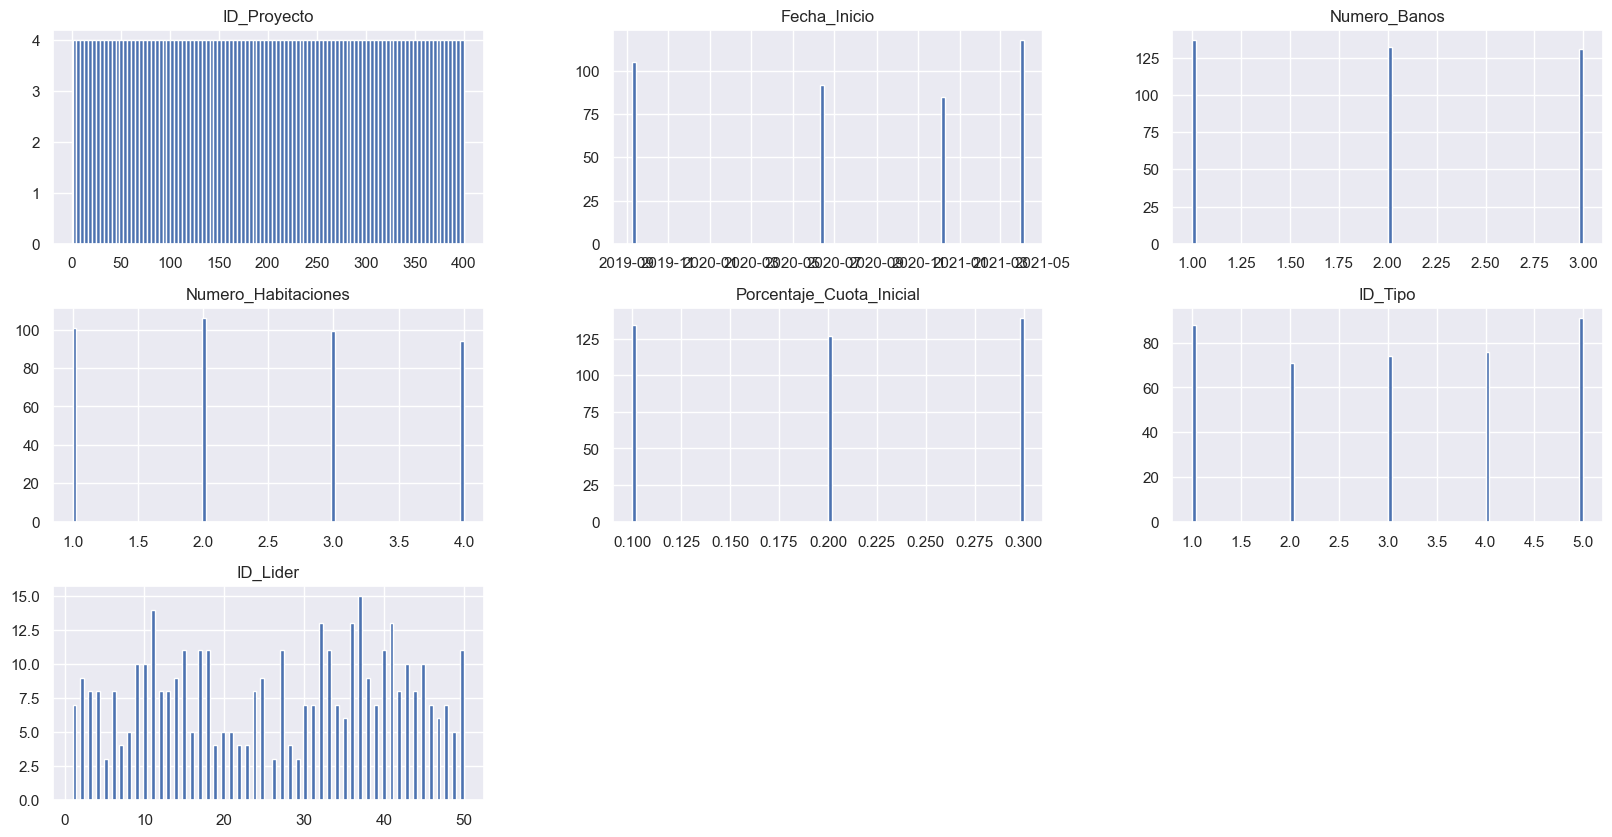

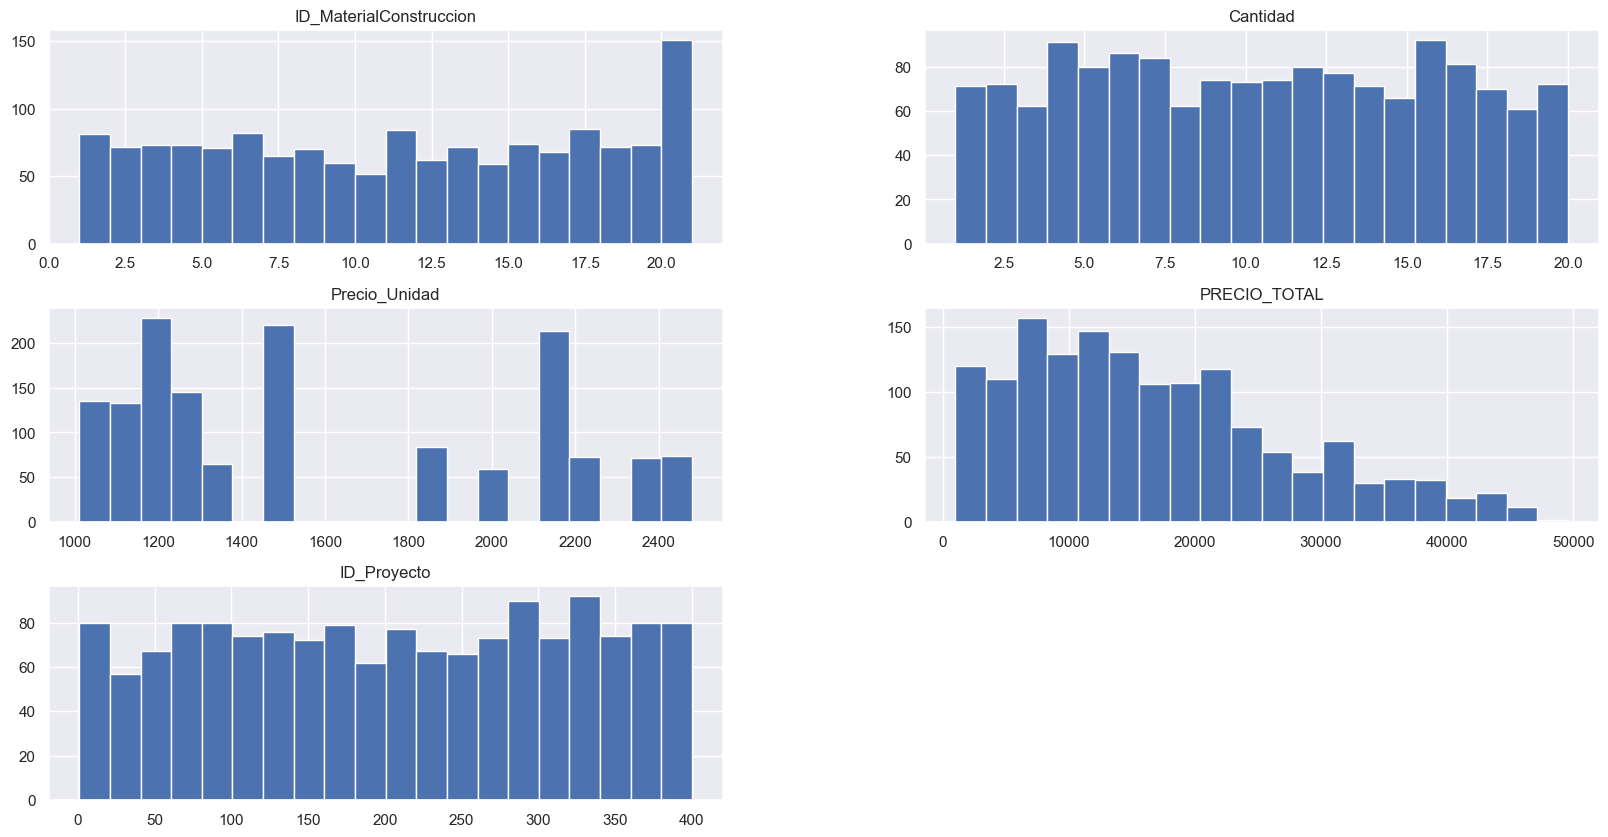

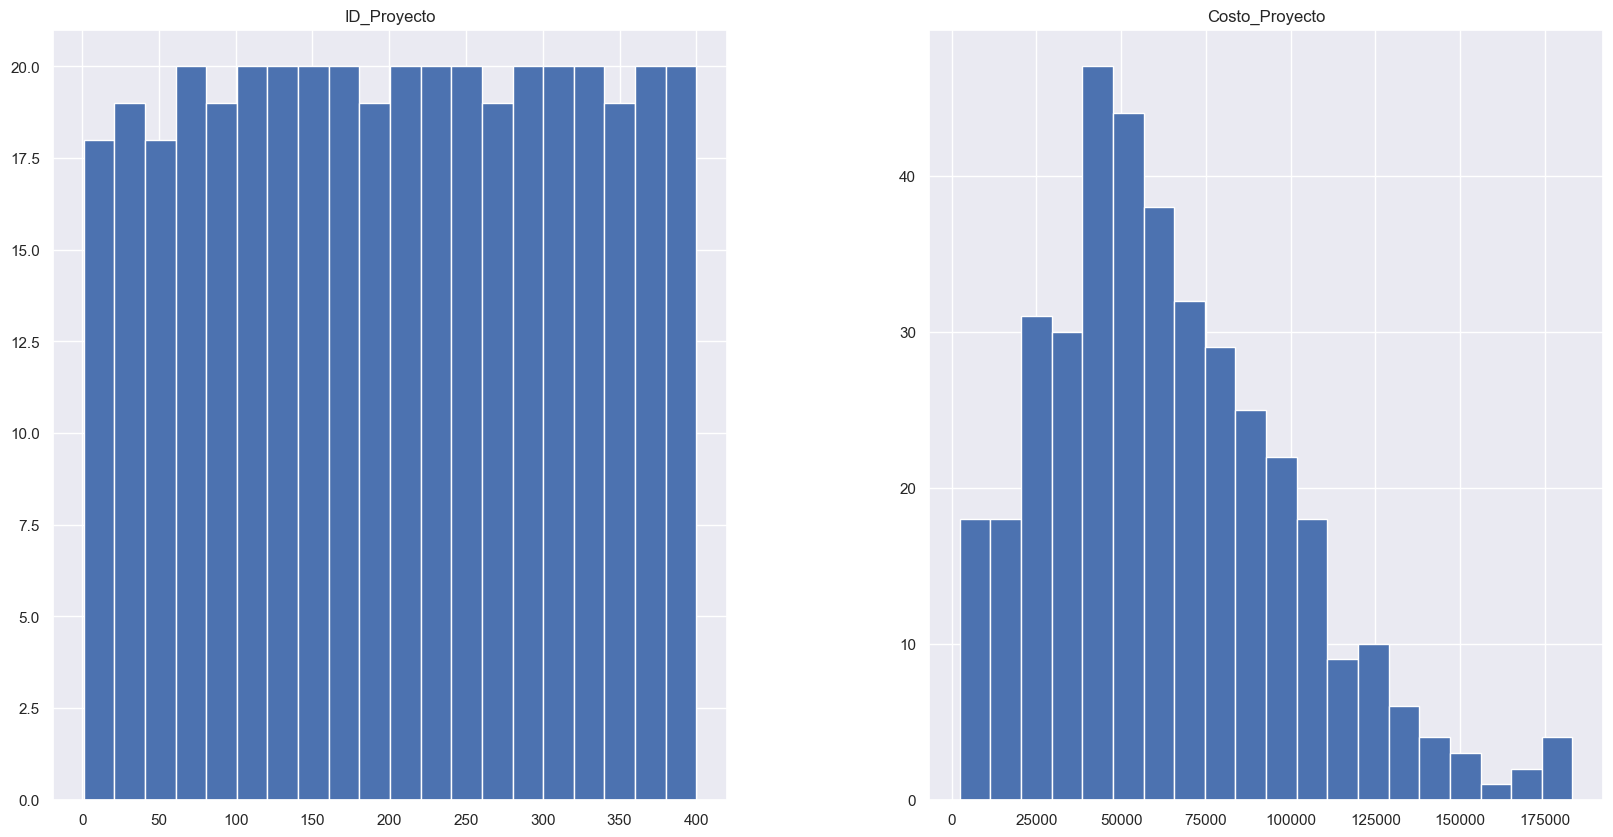

In [87]:

dfProyecto.hist(bins=100, figsize=(20, 10))
plt.show()
dfPrecios.hist(bins=20, figsize=(20, 10))
plt.show()
dfCostoPro.hist(bins=20, figsize=(20, 10))
plt.show()

In [88]:
dfPrecios

,ID_MaterialConstruccion,Nombre_Material,Cantidad,Precio_Unidad,PRECIO_TOTAL,ID_Proyecto
0,5,Vidrio,6,2339,14034,1
1,16,Poliestireno,4,2163,8652,1
2,18,Asfalto,10,1287,12870,1
3,3,Cemento,9,1278,11502,1
4,19,Acrilicos,17,2156,36652,2
...,...,...,...,...,...,...
1494,4,Ladrillo,19,1011,19209,398
1495,4,Ladrillo,5,1011,5055,399
1496,19,Acrilicos,9,2156,19404,400
1497,20,Neopreno,5,1502,7510,400


In [89]:
dfCostoPro.groupby(by="ID_Proyecto").sum()

,Costo_Proyecto
ID_Proyecto,
1,47058
2,55964
4,35247
5,99958
6,43509
...,...
396,109188
397,107462
398,90556


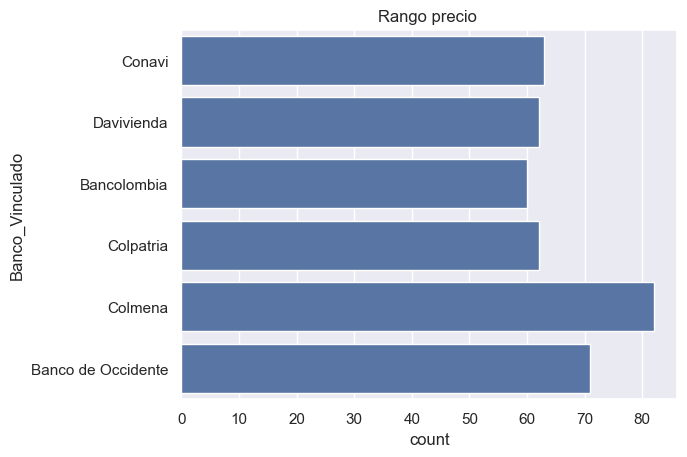

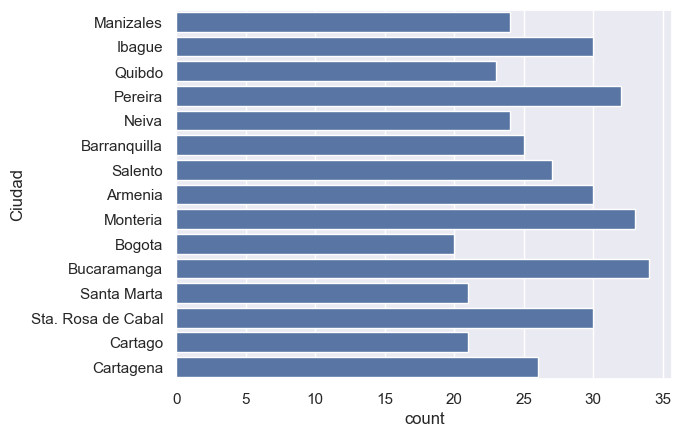

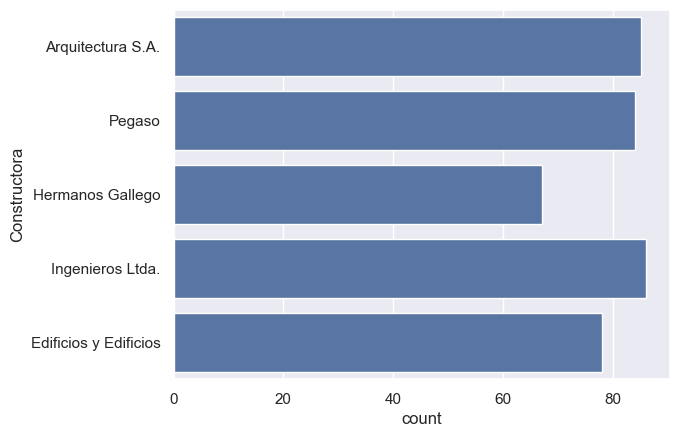

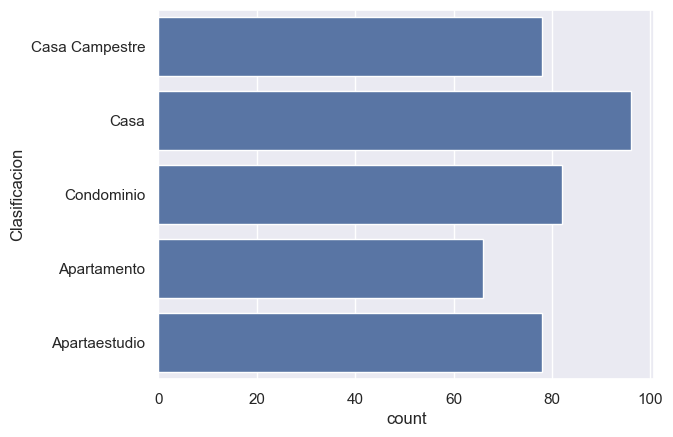

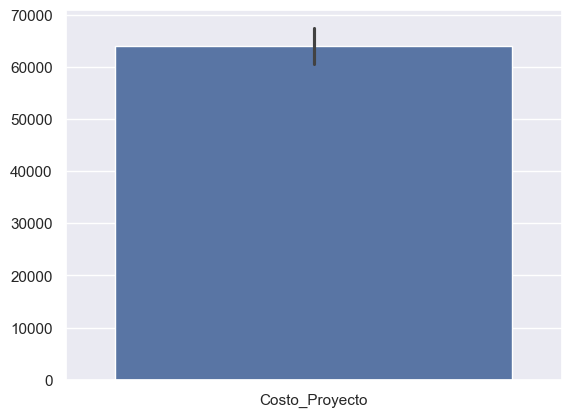

In [90]:
# fig = plt.Figure(figsize=(10,7))


sns.countplot(dfProyecto.Banco_Vinculado)
plt.title("Rango precio ")
plt.show()

# plt.figure(figsize=(30, 12))
# plt.title("Departamento")
sns.countplot(dfProyecto.Ciudad)
# plt.xticks(rotation=90)
plt.show()
sns.countplot(dfProyecto.Constructora)
# plt.xticks(rotation=90)
plt.show()
sns.countplot(dfProyecto.Clasificacion)
# plt.xticks(rotation=90)
plt.show()

sns.barplot(dfCostoPro.groupby(by="ID_Proyecto").sum())
# plt.xticks(rotation=90)
plt.show()

In [91]:
dfProyecto

,ID_Proyecto,Fecha_Inicio,Constructora,Numero_Banos,Numero_Habitaciones,Banco_Vinculado,Porcentaje_Cuota_Inicial,Ciudad,Clasificacion,Acabados,ID_Tipo,ID_Lider
0,1,2020-12-07,Arquitectura S.A.,2.0,2.0,Conavi,0.3,Manizales,Casa Campestre,No,4,36
1,2,2019-09-09,Pegaso,1.0,1.0,Davivienda,0.1,Ibague,Casa Campestre,No,1,32
2,3,2020-12-07,Hermanos Gallego,1.0,3.0,Bancolombia,0.3,Quibdo,Casa,Si,5,42
3,4,2021-04-04,Ingenieros Ltda.,2.0,4.0,Bancolombia,0.2,Pereira,Condominio,Si,2,12
4,5,2020-12-07,Ingenieros Ltda.,3.0,3.0,Colpatria,0.1,Neiva,Casa,Si,2,46
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,2019-09-09,Hermanos Gallego,2.0,2.0,Davivienda,0.2,Manizales,Casa,No,4,10
396,397,2019-09-09,Arquitectura S.A.,1.0,1.0,Colpatria,0.2,Armenia,Casa Campestre,Si,4,17
397,398,2019-09-09,Hermanos Gallego,3.0,1.0,Conavi,0.1,Bucaramanga,Apartaestudio,Si,3,44
398,399,2020-06-15,Arquitectura S.A.,2.0,3.0,Banco de Occidente,0.3,Pereira,Apartaestudio,Si,2,27


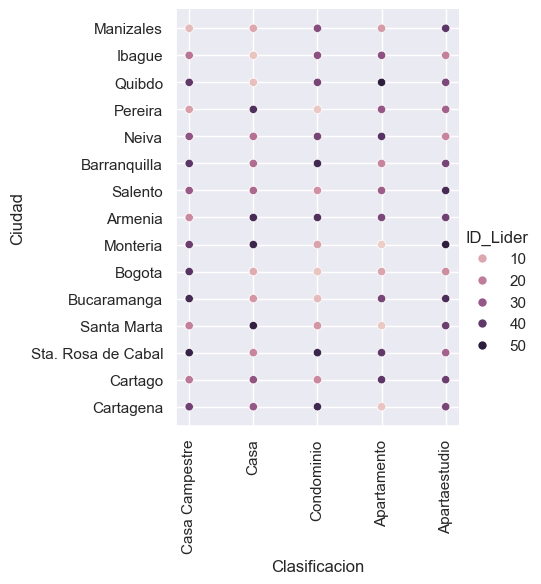

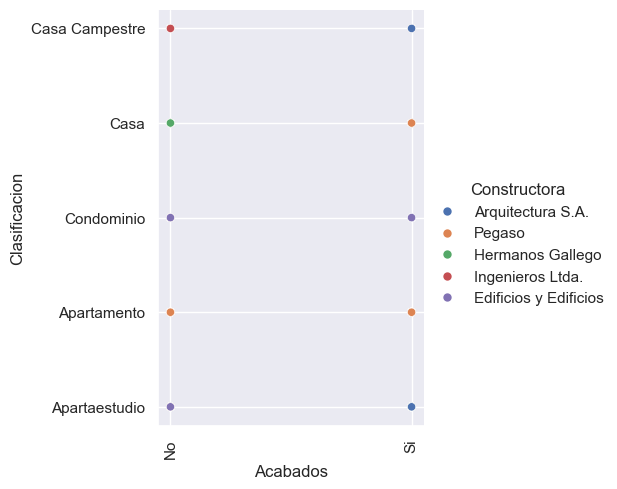

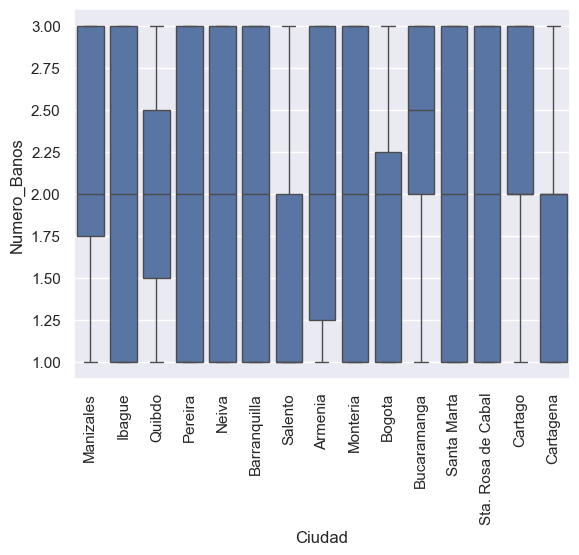

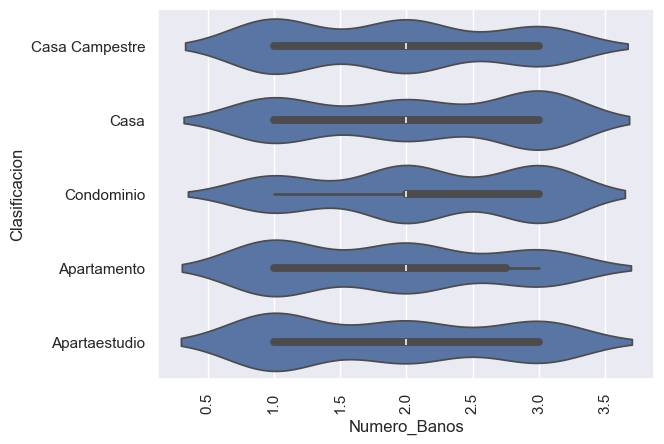

In [92]:
sns.relplot(x='Clasificacion', y='Ciudad',
            hue='ID_Lider', data=dfProyecto)
plt.xticks(rotation=90)
plt.show()
sns.relplot(x='Acabados', y='Clasificacion',
            hue='Constructora', data=dfProyecto)
plt.xticks(rotation=90)
plt.show()
grafBox(dfProyecto.Ciudad, dfProyecto.Numero_Banos, location="")
grafViolin(dfProyecto, 'Numero_Banos', 'Clasificacion')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID_Compra                1499 non-null   int64         
 1   Cantidad                 1499 non-null   int64         
 2   Proveedor                1499 non-null   object        
 3   Pagado                   1499 non-null   object        
 4   Fecha                    1499 non-null   datetime64[ns]
 5   ID_Proyecto              1499 non-null   int64         
 6   ID_MaterialConstruccion  1499 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 82.1+ KB


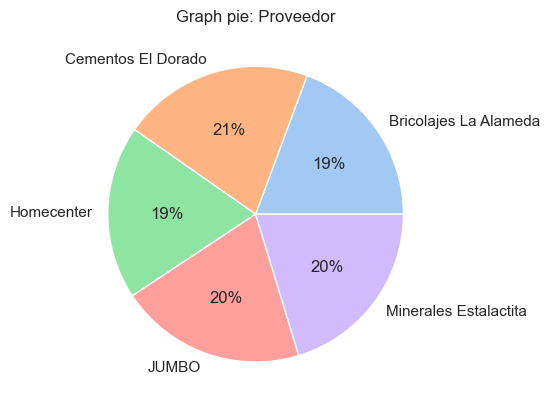

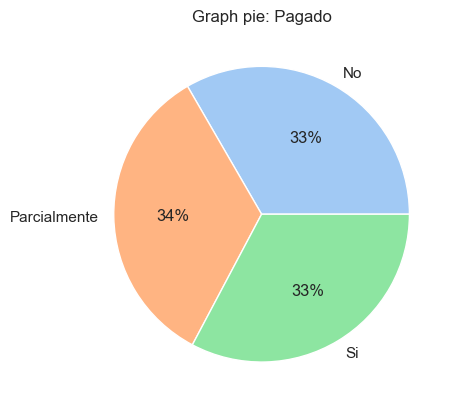

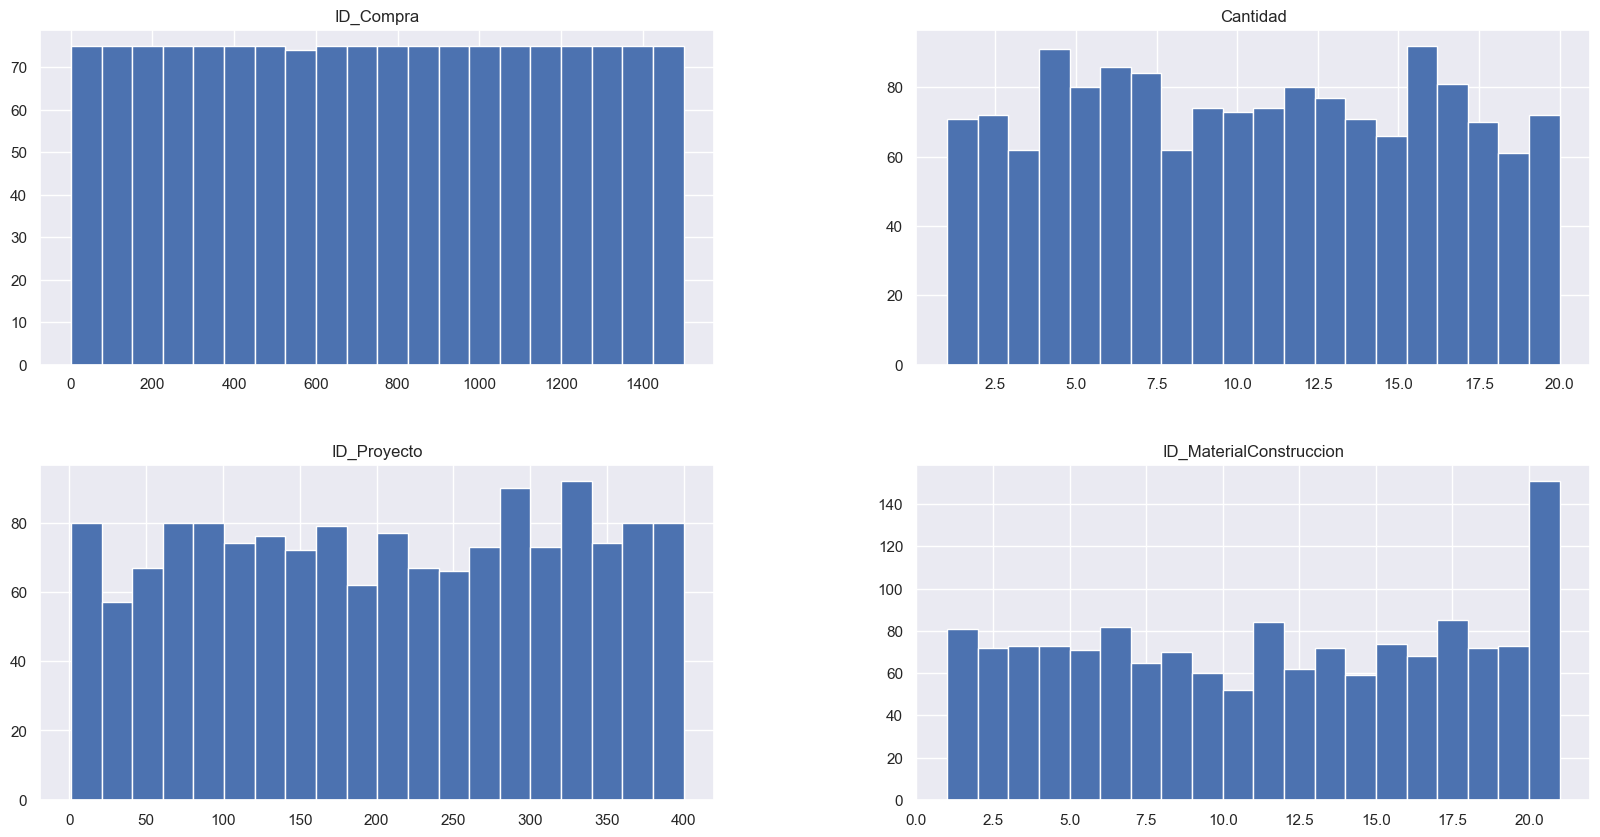

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_Lider           50 non-null     int64         
 1   Nombre             50 non-null     object        
 2   Primer_Apellido    50 non-null     object        
 3   Segundo_Apellido   50 non-null     object        
 4   Salario            50 non-null     int64         
 5   Ciudad_Residencia  50 non-null     object        
 6   Cargo              50 non-null     object        
 7   Clasificacion      50 non-null     float64       
 8   Fecha_Nacimiento   50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 3.6+ KB


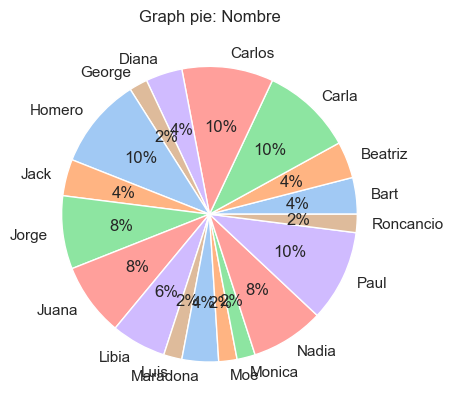

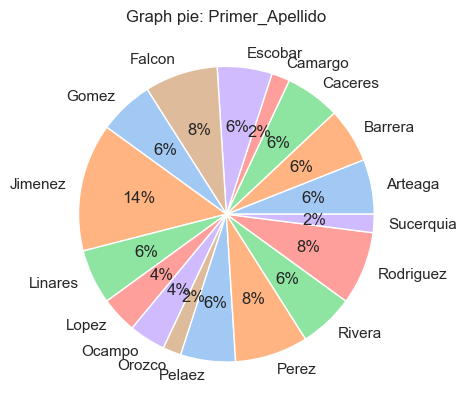

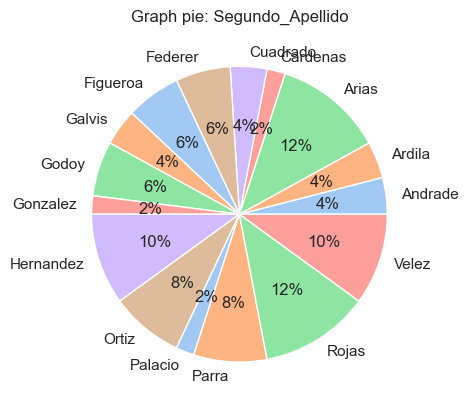

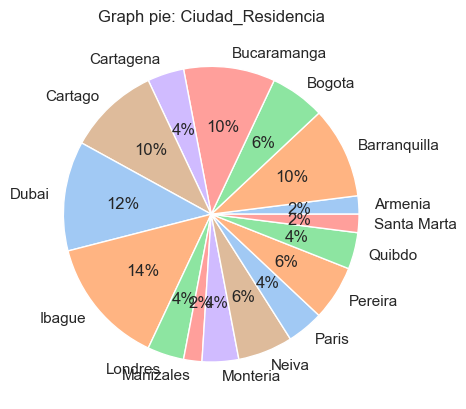

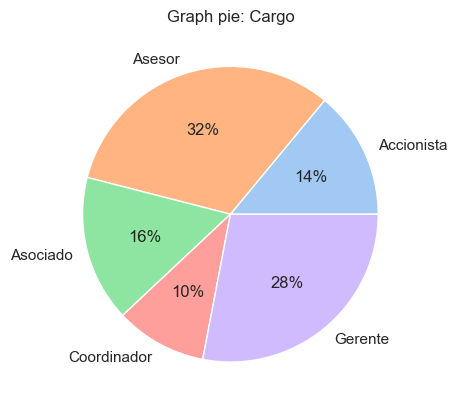

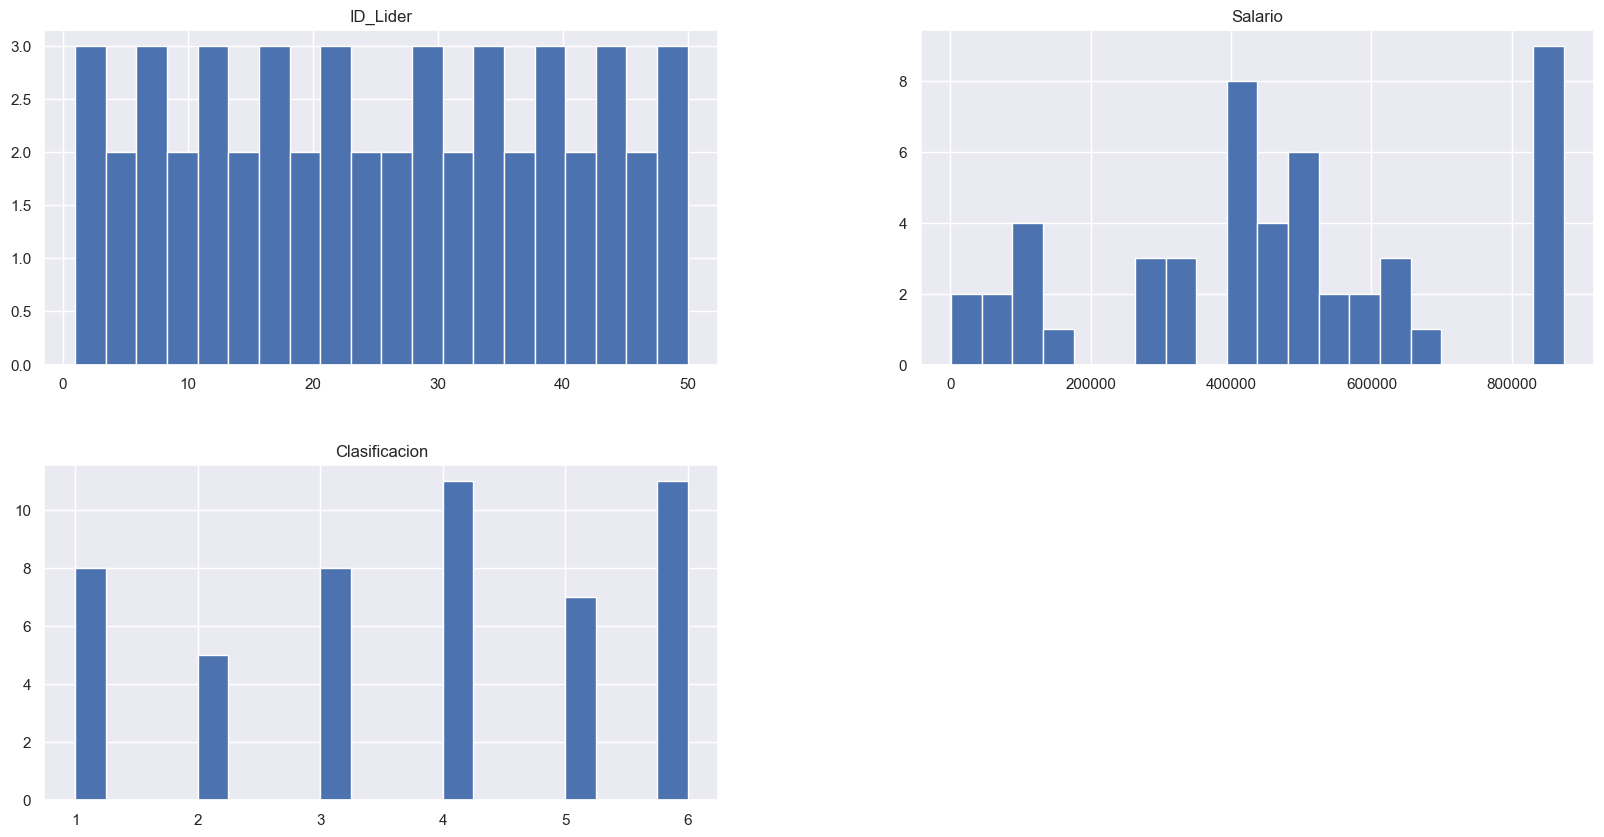

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID_MaterialConstruccion  21 non-null     int64 
 1   Nombre_Material          21 non-null     object
 2   Importado                21 non-null     object
 3   Precio_Unidad            21 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 804.0+ bytes


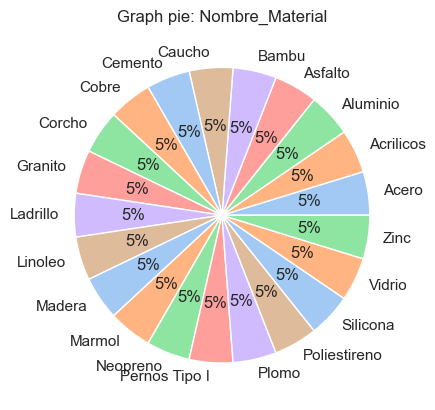

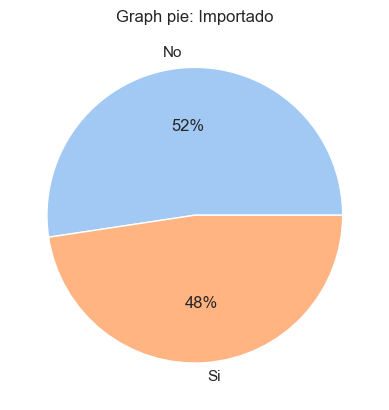

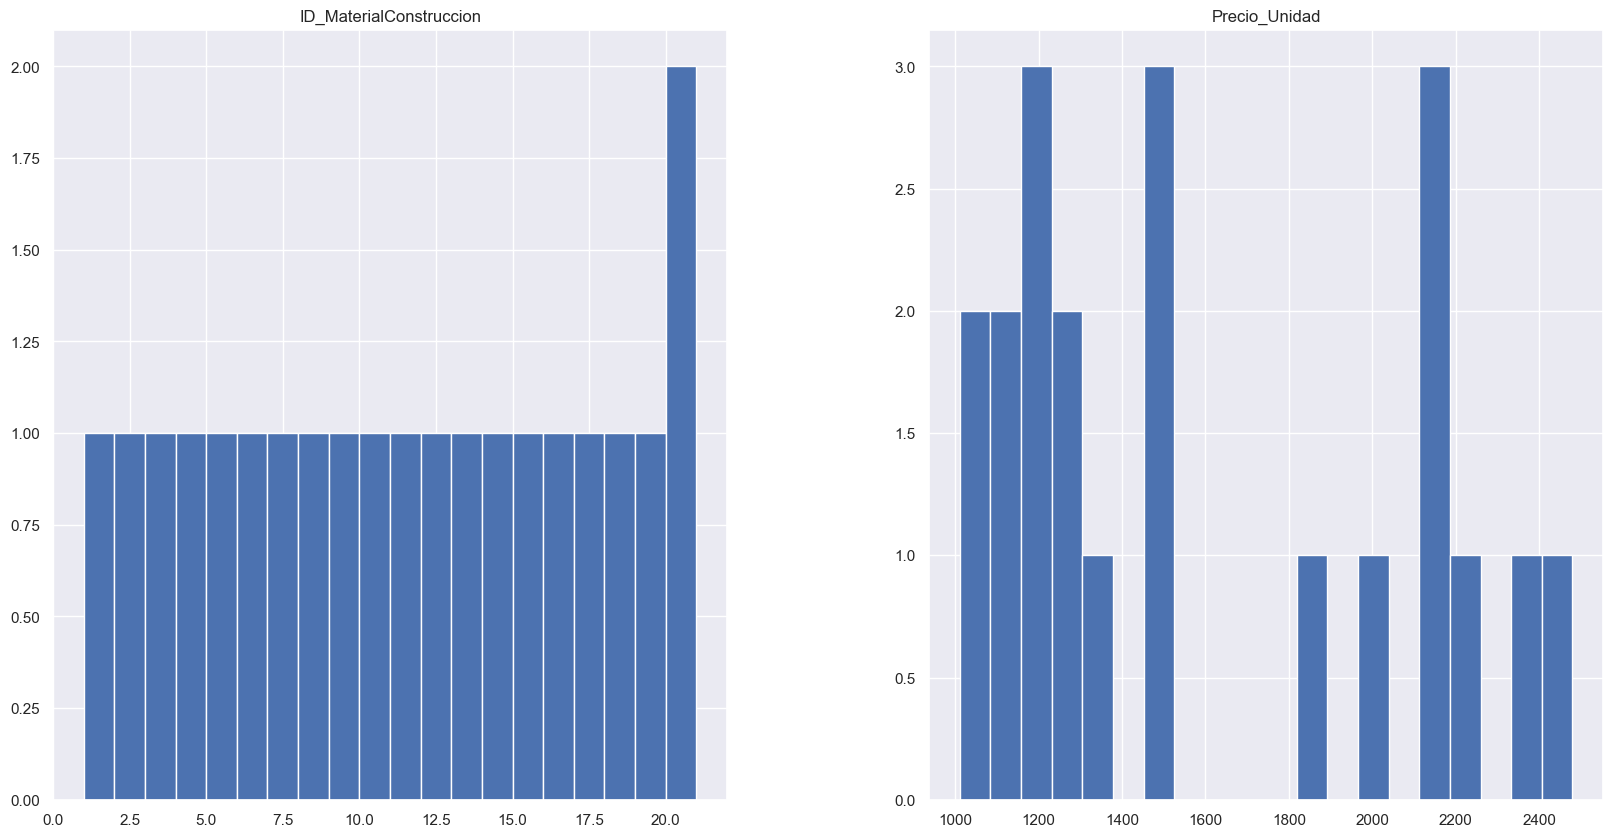

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID_MaterialConstruccion  1499 non-null   int64 
 1   Nombre_Material          1499 non-null   object
 2   Cantidad                 1499 non-null   int64 
 3   Precio_Unidad            1499 non-null   int64 
 4   PRECIO_TOTAL             1499 non-null   int64 
 5   ID_Proyecto              1499 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 70.4+ KB


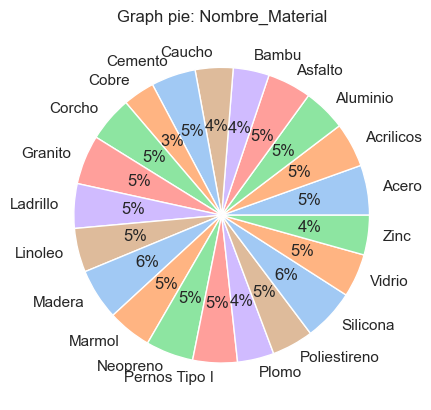

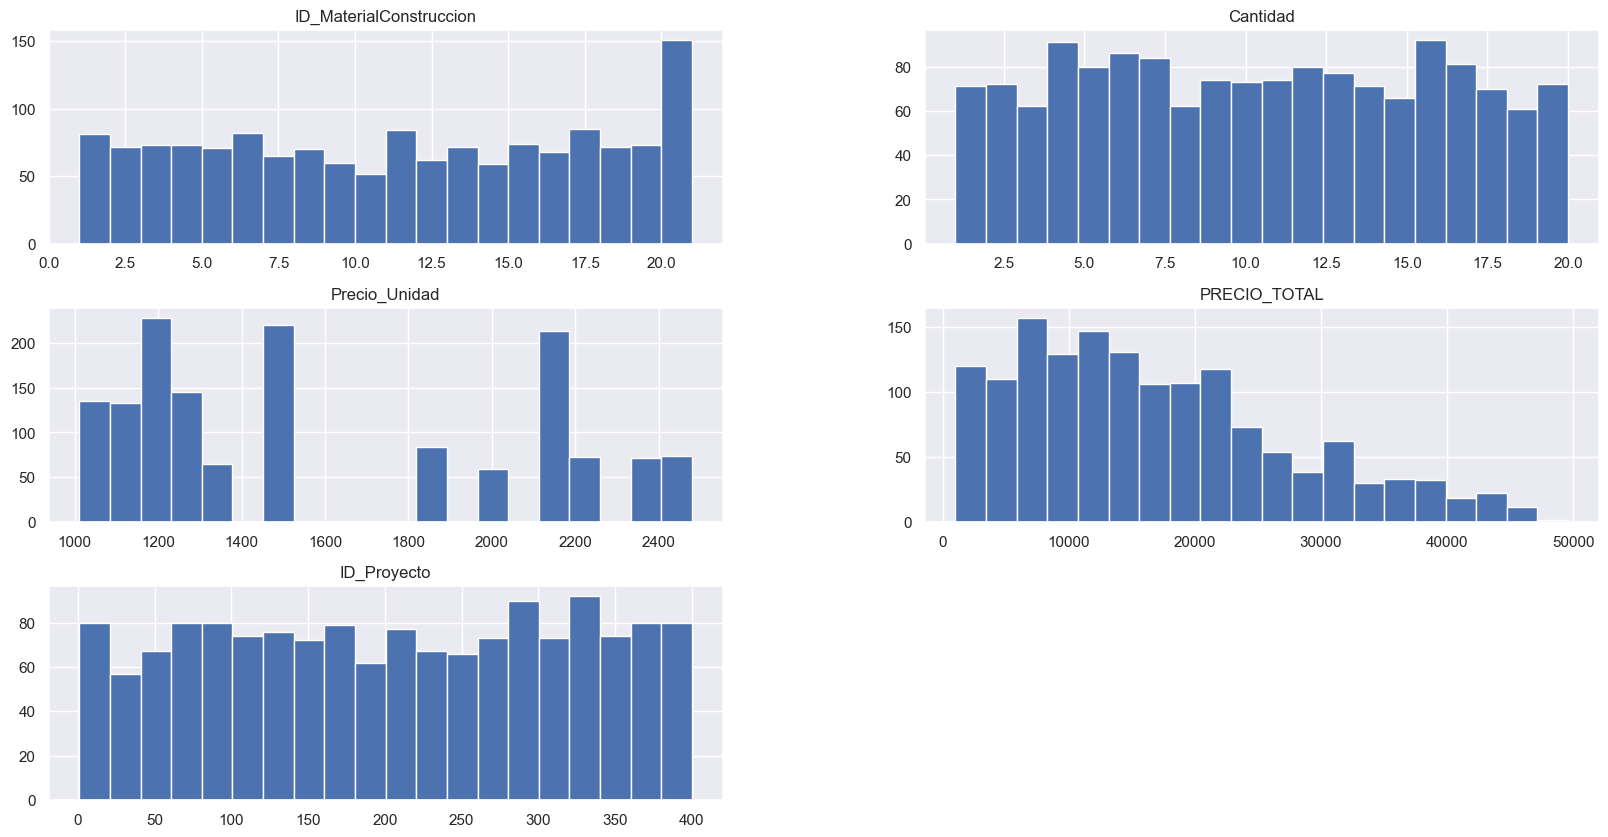

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID_Proyecto               400 non-null    int64         
 1   Fecha_Inicio              400 non-null    datetime64[ns]
 2   Constructora              400 non-null    object        
 3   Numero_Banos              400 non-null    float64       
 4   Numero_Habitaciones       400 non-null    float64       
 5   Banco_Vinculado           400 non-null    object        
 6   Porcentaje_Cuota_Inicial  400 non-null    float64       
 7   Ciudad                    400 non-null    object        
 8   Clasificacion             400 non-null    object        
 9   Acabados                  400 non-null    object        
 10  ID_Tipo                   400 non-null    int64         
 11  ID_Lider                  400 non-null    int64         
dtypes: datetime64[ns](1), 

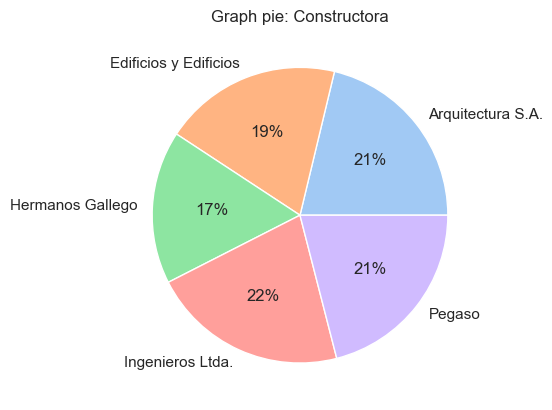

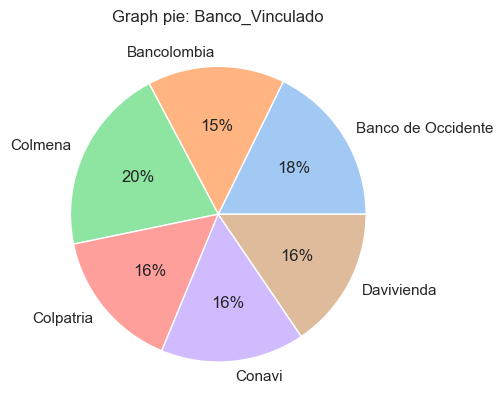

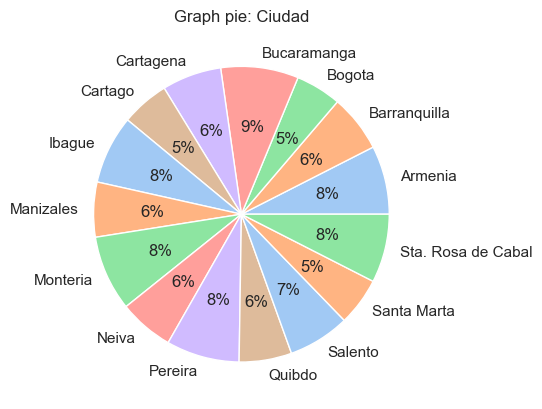

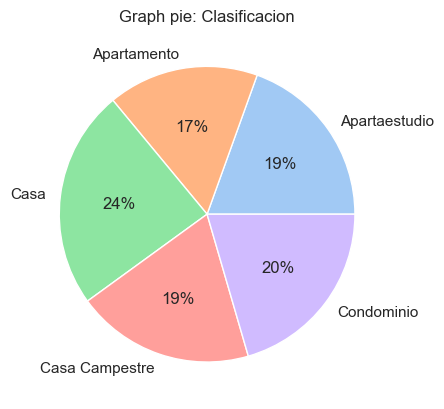

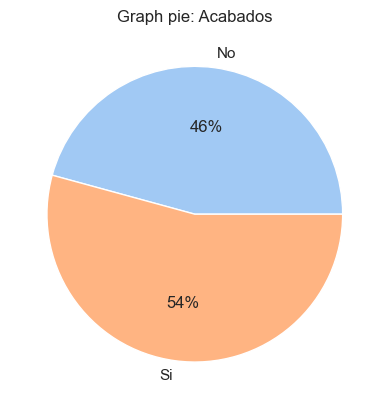

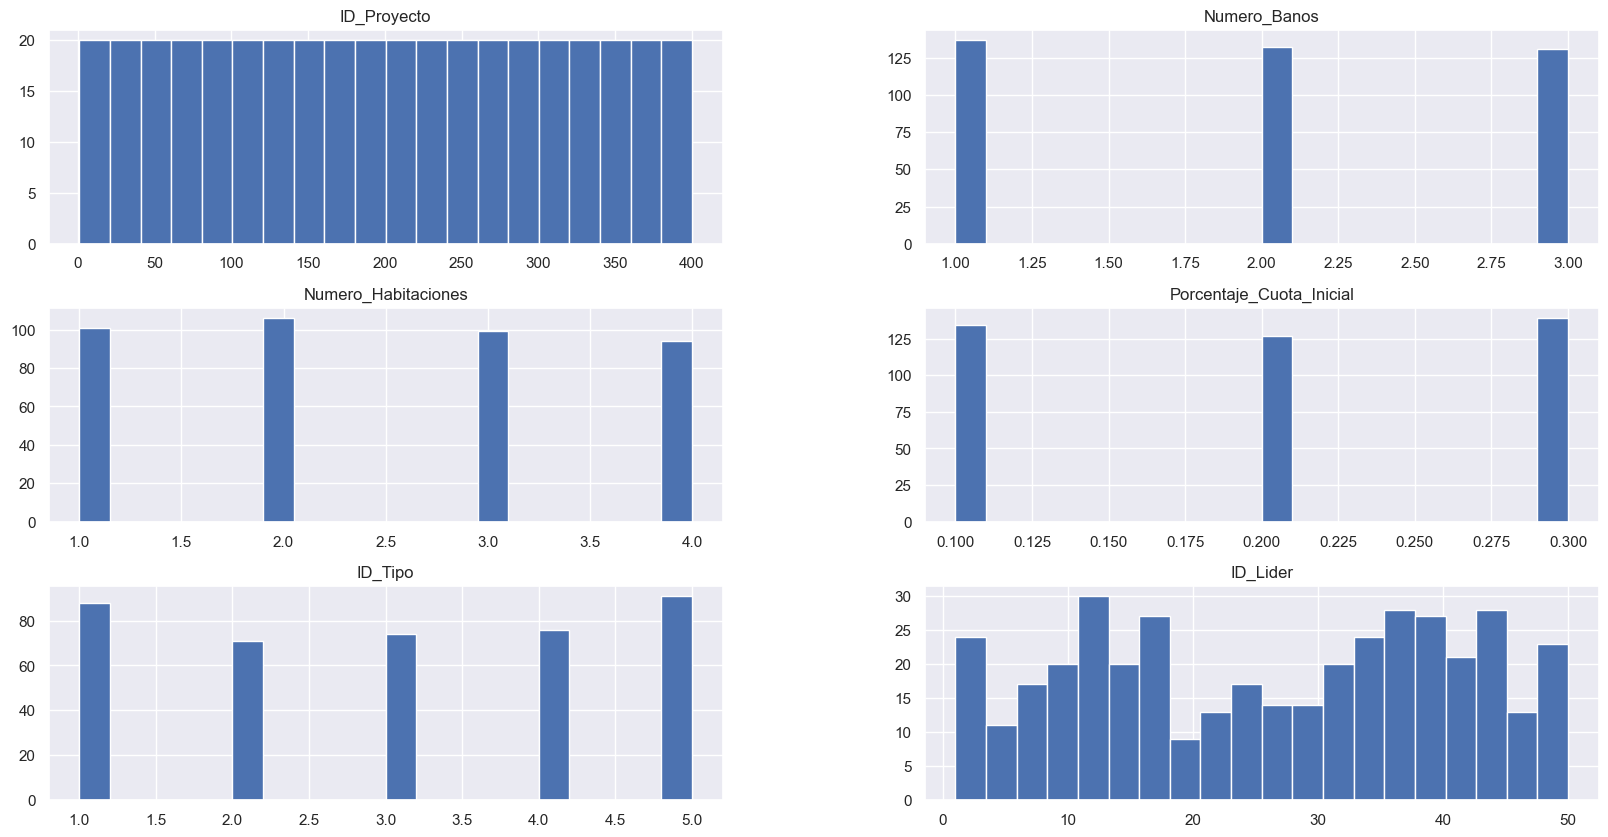

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID_Tipo      5 non-null      int64
 1   Codigo_Tipo  5 non-null      int64
 2   Area_Max     5 non-null      int64
 3   Financiable  5 non-null      int64
 4   Estrato      5 non-null      int64
dtypes: int64(5)
memory usage: 332.0 bytes


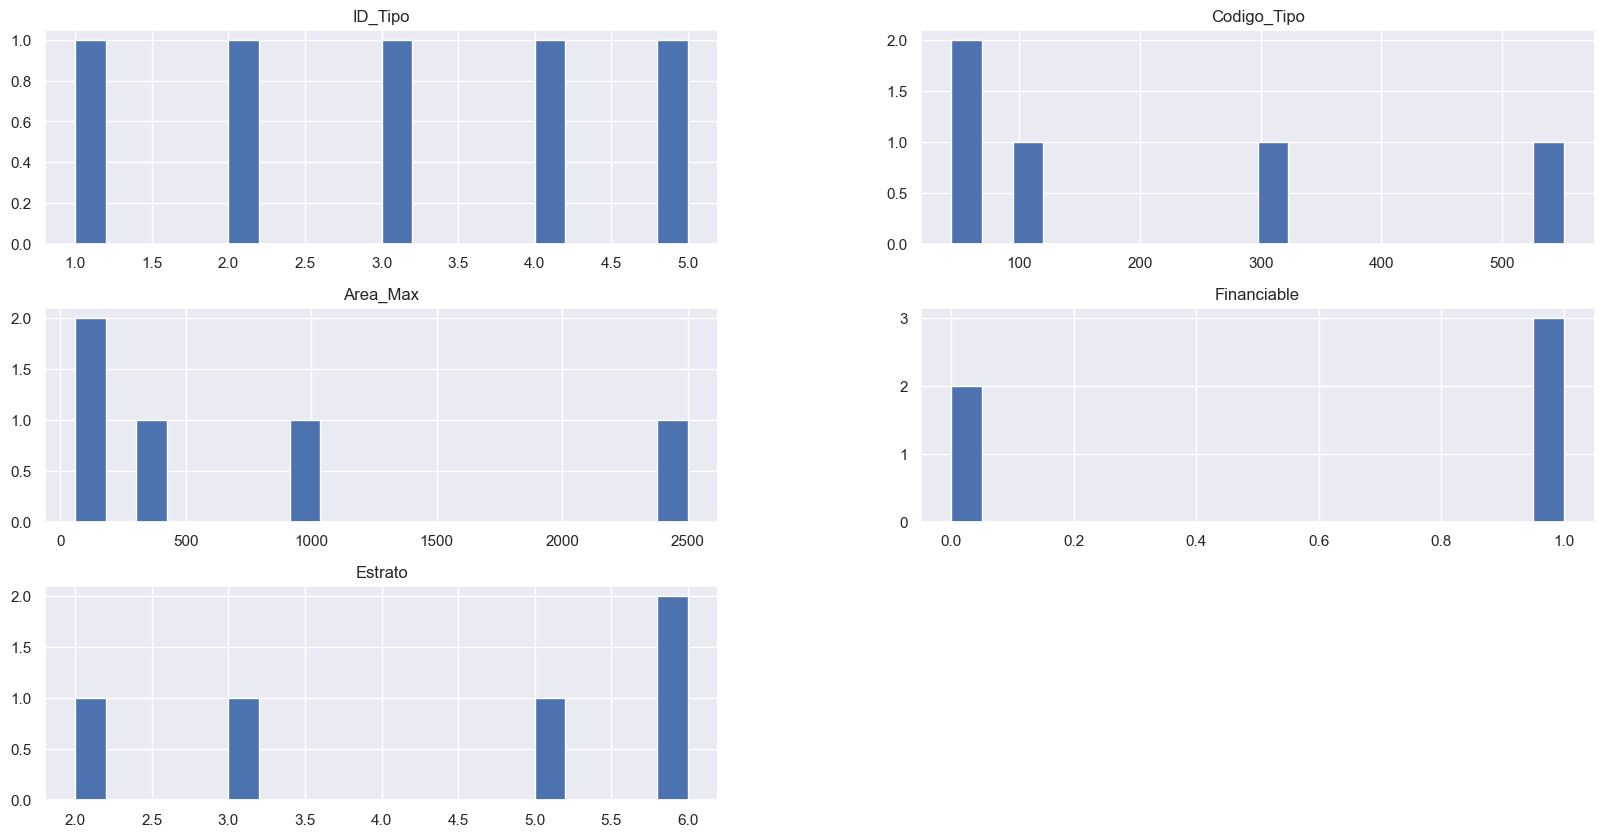

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID_MaterialConstruccion  1499 non-null   int64 
 1   Nombre_Material          1499 non-null   object
 2   Cantidad                 1499 non-null   int64 
 3   Precio_Unidad            1499 non-null   int64 
 4   PRECIO_TOTAL             1499 non-null   int64 
 5   ID_Proyecto              1499 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 70.4+ KB


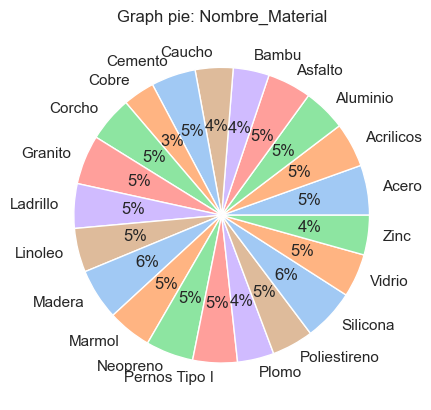

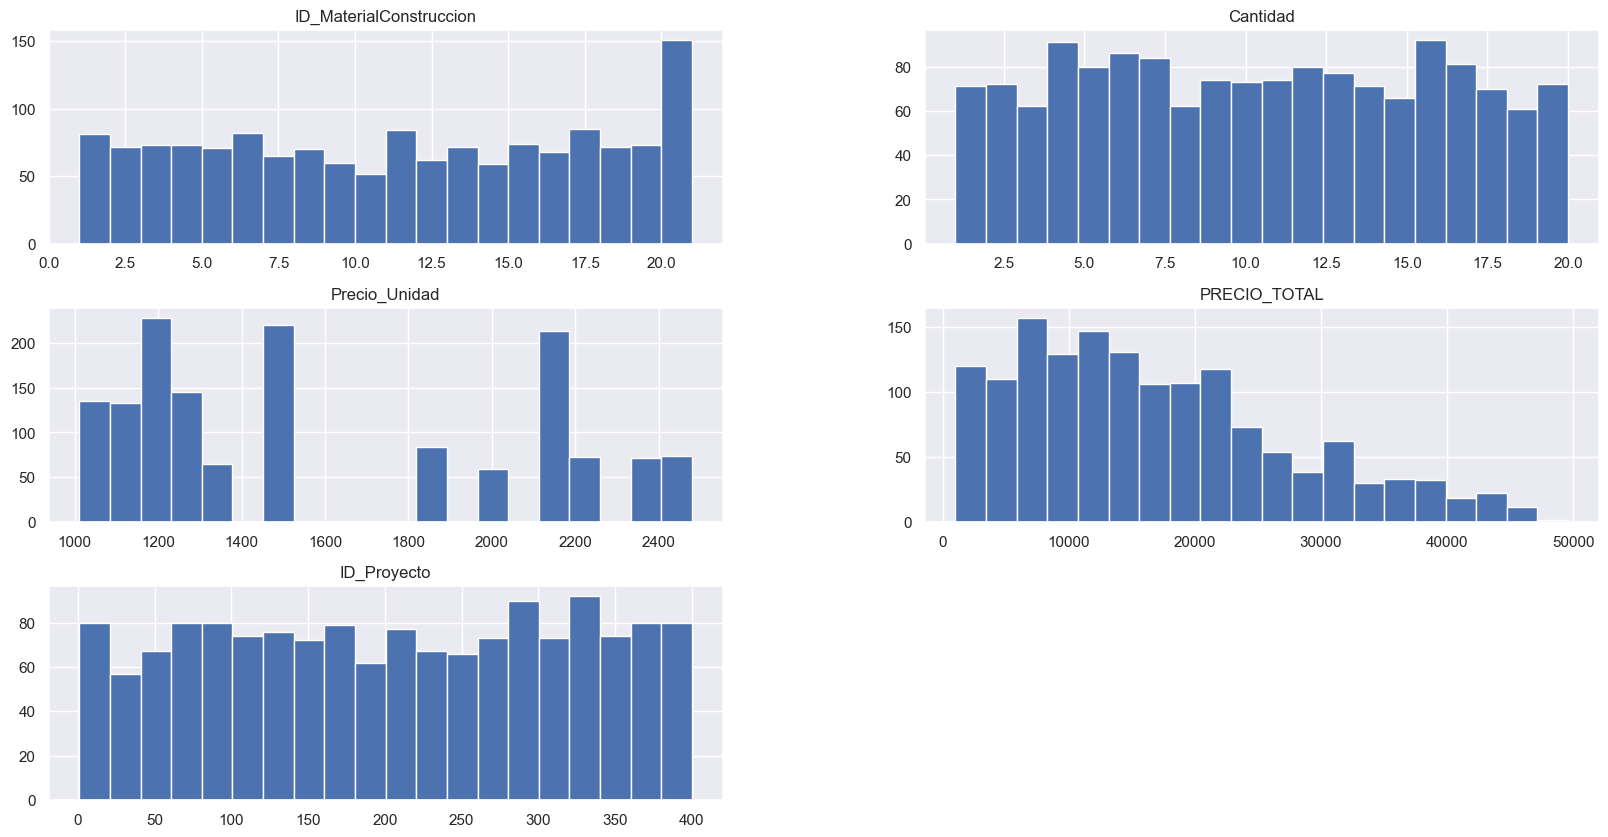

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID_Proyecto     391 non-null    int64
 1   Costo_Proyecto  391 non-null    int64
dtypes: int64(2)
memory usage: 6.2 KB


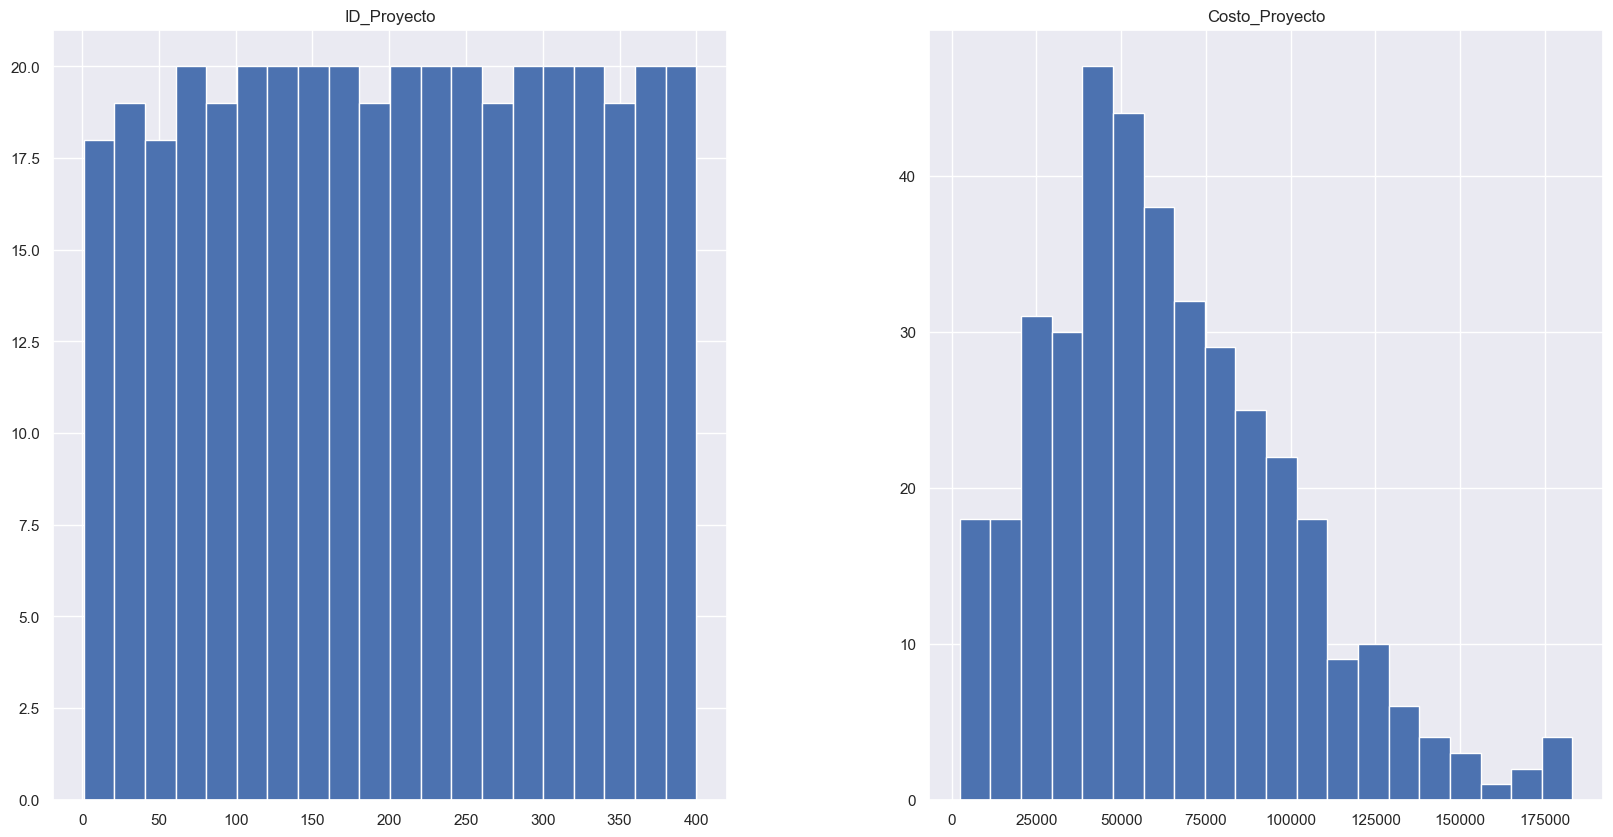

In [100]:
for dataob in data:
    PieObj(dataob)

In [94]:
conn.close()